In [1]:
#Import the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Source: https://freedomhouse.org/sites/default/files/2022-02/All_data_FIW_2013-2022.xlsx

In [3]:
#Reading the data and looking over it to make sure everything looks as it should
df = pd.read_excel("All_data_FIW_2013-2022.xlsx", sheet_name = 1, skiprows=[0])
df.head()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93


In [4]:
#Change display option to allow all columns to be viewed simultaneously
pd.set_option("display.max_columns", None)

In [5]:
#Confirm the setting works as intended
df.head()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,A,B1,B2,B3,B4,B,C1,C2,C3,C,Add Q,Add A,PR,D1,D2,D3,D4,D,E1,E2,E3,E,F1,F2,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,5,2,3,2,1,8,1,1,2,4,0,NaN,17,2,2,1,3,8,3,2,1,6,1,1,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,0,0,0,0,0,0,0,1,0,1,0,NaN,1,1,1,1,1,4,1,1,1,3,0,0,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,9,3,3,3,3,12,3,2,2,7,0,NaN,28,2,4,3,4,13,3,3,2,8,2,2,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,3,1,1,1,1,4,1,1,1,3,0,NaN,10,1,1,2,2,6,1,1,1,3,1,1,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,12,4,4,4,3,15,3,4,4,11,0,NaN,38,3,3,4,4,14,4,4,3,11,4,4,4,3,15,4,4,3,4,15,55,93


In [6]:
#Exploratory Data Analysis begins - determine the shape of the DataFrame
df.shape

(2095, 44)

In [7]:
#Determine how often years appear in the database
df["Edition"].value_counts()

2022    210
2021    210
2020    210
2016    210
2015    210
2019    209
2018    209
2017    209
2014    209
2013    209
Name: Edition, dtype: int64

In [8]:
#Subset the database - we are only interested in the most recent edition, containing data for the year 2022
df = df[df["Edition"] == 2022]

In [9]:
#Verify that each country/territory only appears once
df.iloc[:,0].value_counts()

Abkhazia           1
Serbia             1
North Korea        1
North Macedonia    1
Northern Cyprus    1
                  ..
Guinea-Bissau      1
Guyana             1
Haiti              1
Honduras           1
Zimbabwe           1
Name: Country/Territory, Length: 210, dtype: int64

In [10]:
#Get an idea of what the values look like for the Total column, containing the Total democracy score
df.Total.value_counts()

93    9
79    6
97    5
83    5
94    5
     ..
71    1
98    1
39    1
30    1
2     1
Name: Total, Length: 84, dtype: int64

In [11]:
#Subset the DataFrame again, to only include the columns we need for this analysis: Country name, and Total democracy score 
smalldf = df.iloc[:,[0,-1]].copy()

In [12]:
#Look over the resulting DataFrame to see that the results were as expected
smalldf.head()

,Country/Territory,Total
0,Abkhazia,40
1,Afghanistan,10
2,Albania,67
3,Algeria,32
4,Andorra,93


In [13]:
#Rename the first column to something less clunky
smalldf.rename({'Country/Territory':'Country'}, axis=1, inplace=True)

In [14]:
#Due to recency of events, I found no immediately accessible database containing the list of countries deemed by Russia as "unfriendly nations".
#Thus, we create our own Series based on journalistic reports
#Source: https://www.aljazeera.com/news/2022/3/8/russia-deals-with-unfriendly-countries-require-moscow-approval
string = "Albania, Andorra, Australia, Great Britain, Jersey, Anguilla, British Virgin Islands, Gibraltar, Iceland, Canada, Liechtenstein, Micronesia, Monaco, New Zealand, Norway, South Korea, San Marino, North Macedonia, Singapore, United States, Taiwan, Ukraine, Montenegro, Switzerland, Japan, Austria, Belgium, Bulgaria, Croatia, Republic of Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden"

In [15]:
#Split the string into separate nations and make it a Series. Calculate the length to see how many nations we are adding
x = pd.Series(string.split(", "))
len(x)

52

In [16]:
#Compare the Series with the DataFrame - all countries in the Series should be within the DataFrame. If not, we have to edit the names.
for i in x:
  if len(smalldf[smalldf.Country.str.contains(i)]) == 0:
    print(i)
#Four of these are part of the United Kingdom and won't be touched further, but we can do something about Great Britain and Republic of Cyprus

Great Britain
Jersey
Anguilla
British Virgin Islands
Gibraltar
Republic of Cyprus


In [17]:
#Look up what the name corresponding to "Republic of Cyprus" is within our DataFrame
smalldf[smalldf['Country'].str.contains('Cyprus')]

,Country,Total
46,Cyprus,93
135,Northern Cyprus,77


In [18]:
#Confirm that the name corresponding to "Great Britain" in the DataFrame is indeed "United Kingdom"
smalldf[smalldf['Country'].str.contains('Kingdom')]

,Country,Total
198,United Kingdom,93


In [19]:
#Change the names in the Series to match their names in the DataFrame
x = x.replace('Great Britain', 'United Kingdom')
x = x.replace('Republic of Cyprus', 'Cyprus')

In [20]:
#Create a new column in the DataFrame. If a country is deemed as an "Unfriendly nation" by Russia, set the corresponding value to True, otherwise False
#Preview the change 
smalldf['Unfriendly'] = smalldf.Country.isin(x).copy()
smalldf.head()

,Country,Total,Unfriendly
0,Abkhazia,40,False
1,Afghanistan,10,False
2,Albania,67,True
3,Algeria,32,False
4,Andorra,93,True


In [21]:
#Check the number of True's in the new Unfriendly column. If everything worked, this number should be equal to the length of x, minus territories
smalldf.Unfriendly.sum()

48

In [22]:
pd.crosstab(smalldf.Unfriendly, smalldf.Total)

Total,1,2,3,4,5,7,8,9,10,11,12,13,14,15,17,18,19,21,22,23,24,25,27,28,29,30,32,33,34,35,36,37,39,40,42,43,47,48,49,50,51,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,72,73,76,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
Unfriendly,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,3,1,2,2,1,4,2,5,2,3,2,1,3,2,3,2,3,1,1,4,3,1,2,2,3,1,3,2,3,1,1,3,1,2,3,4,2,1,2,1,3,2,3,1,1,2,3,2,2,3,1,2,2,3,0,2,0,1,3,2,1,3,5,2,0,2,2,3,1,1,1,0,2,0,3,3,4,1,1,0,1,0,0,0
True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,1,0,3,1,1,0,1,1,3,5,1,1,5,4,2,3,4,1,1,3


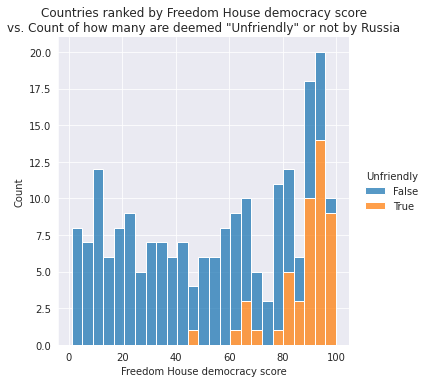

In [23]:
#Visually explore whether there seems to be any correlation between the democracy score of a country and whether they're deemed "Unfriendly" or not

sns.set_style('darkgrid')

sns.displot(data = smalldf, x = "Total", hue="Unfriendly", kind="hist", bins=25, multiple="stack")
plt.title('Countries ranked by Freedom House democracy score\nvs. Count of how many are deemed "Unfriendly" or not by Russia')
plt.xlabel('Freedom House democracy score')
plt.ylabel('Count')
plt.show()
# It seems that the higher democracy score a country gets, the more likely it is to be deemed "Unfriendly"

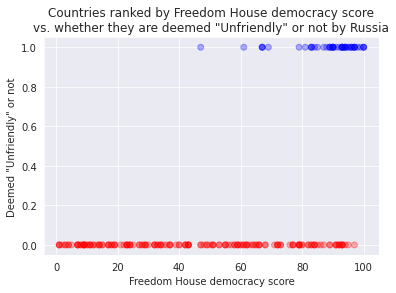

In [24]:
#Get an alternate visual indication on how the countries are split
colors = {True:"blue", False:"red"}
plt.scatter(x = smalldf.Total, y = smalldf.Unfriendly, alpha=0.3, color=smalldf['Unfriendly'].map(colors))
plt.title('Countries ranked by Freedom House democracy score\nvs. whether they are deemed "Unfriendly" or not by Russia')
plt.xlabel('Freedom House democracy score')
plt.ylabel('Deemed "Unfriendly" or not')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


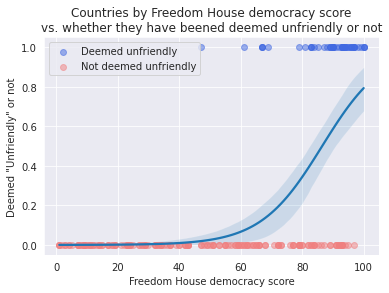

In [25]:
#Create a plot with a logistical regression to visualize how likely it is that a country will be deemed "Unfriendly" or not based on their Total democracy score

sns.regplot(data = smalldf, x = "Total", y = 'Unfriendly', logistic=True, truncate=True, scatter_kws={'alpha':0})
sns.regplot(data = smalldf[smalldf['Unfriendly'] == True], x = "Total", y = 'Unfriendly', fit_reg = False, color = "royalblue", scatter_kws={'alpha':0.5}, label="Deemed unfriendly")
sns.regplot(data = smalldf[smalldf['Unfriendly'] == False], x = "Total", y = "Unfriendly", color = "lightcoral", fit_reg = False, scatter_kws={'alpha':0.5}, label="Not deemed unfriendly")
plt.title('Countries by Freedom House democracy score\nvs. whether they have beened deemed unfriendly or not')
plt.xlabel('Freedom House democracy score')
plt.ylabel('Deemed "Unfriendly" or not')
plt.legend()
plt.show()

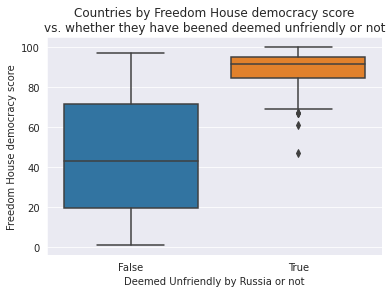

In [26]:
# Create a boxplot to visualise the spread

sns.boxplot(data = smalldf, x='Unfriendly', y='Total')
plt.title('Countries by Freedom House democracy score\nvs. whether they have beened deemed unfriendly or not')
plt.ylabel('Freedom House democracy score')
plt.xlabel('Deemed Unfriendly by Russia or not')
plt.show()

In [27]:
# Check for statistical significance in the observed data
import statsmodels.api as sm

X = smalldf['Total'].copy()
Y = smalldf['Unfriendly'].copy()
log_reg = sm.Logit(Y, X).fit()
print(log_reg.summary())

# with a P>|z| value of 0.001, we can be 99.9% sure that the difference between the observed groups (Unfriendly or not) is due to an actual difference, and not just chance

Optimization terminated successfully.
         Current function value: 0.663665
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Unfriendly   No. Observations:                  210
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                            0
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                 -0.2346
Time:                        11:12:06   Log-Likelihood:                -139.37
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Total         -0.0078      0.002     -3.431      0.001      -0.012      -0.003


In [28]:
#Transitioning into machine learning. We want to predict whether a country has been sanctioned or not dependent on the region a country is in, as well as the democracy score.
smalldf['Region'] = df['Region'].copy()
smalldf.head()

,Country,Total,Unfriendly,Region
0,Abkhazia,40,False,Eurasia
1,Afghanistan,10,False,Asia
2,Albania,67,True,Europe
3,Algeria,32,False,Africa
4,Andorra,93,True,Europe


In [29]:
#Check that the Cyprus/UK data still looks good
smalldf[smalldf['Country'].str.contains('Cyprus')]

,Country,Total,Unfriendly,Region
46,Cyprus,93,True,Europe
135,Northern Cyprus,77,False,Europe


In [30]:
#Check that the Cyprus/UK data still looks good
smalldf[smalldf['Country'].str.contains('United')]

,Country,Total,Unfriendly,Region
197,United Arab Emirates,17,False,Middle East
198,United Kingdom,93,True,Europe
199,United States,83,True,Americas


In [31]:
#Get dummy variables for the Region column to facilitate machine learning
smalldf = pd.concat([smalldf, pd.get_dummies(smalldf['Region'], prefix='Region', prefix_sep='_')], axis=1)
smalldf.head()

,Country,Total,Unfriendly,Region,Region_Africa,Region_Americas,Region_Asia,Region_Eurasia,Region_Europe,Region_Middle East
0,Abkhazia,40,False,Eurasia,0,0,0,1,0,0
1,Afghanistan,10,False,Asia,0,0,1,0,0,0
2,Albania,67,True,Europe,0,0,0,0,1,0
3,Algeria,32,False,Africa,1,0,0,0,0,0
4,Andorra,93,True,Europe,0,0,0,0,1,0


In [32]:
#Define x and y variables
x = smalldf.drop(['Country', 'Unfriendly', 'Region'],axis=1).to_numpy()
y = smalldf['Unfriendly'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [33]:
#Script for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('Logistic Regression', LogisticRegression(solver='liblinear',random_state=1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['Not Unfriendly','Unfriendly']
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))  

[[32  0]
 [ 1  9]]
                precision    recall  f1-score   support

Not Unfriendly       0.97      1.00      0.98        32
    Unfriendly       1.00      0.90      0.95        10

      accuracy                           0.98        42
     macro avg       0.98      0.95      0.97        42
  weighted avg       0.98      0.98      0.98        42



In [34]:
# Predict the outcome of any given input to the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
# giving inputs to the machine learning model
# features = [[Total, Region_Africa, Region_Americas, Region_Asia, Region_Eurasia, Region_Europe, Region_Middle East]]
features = np.array([[0, 0, 0, 0, 0, 0, 0]])
invalidinput = "Invalid input!"
while True:
  temp = input("What is the democracy score of your country? Valid inputs are numbers from 0 to 100.\n")
  if temp.isnumeric():
    if 0 <= int(temp) <= 100:
      features[0,0] = int(temp)
      break
    else:
      print(invalidinput)
  else:
    print(invalidinput)
while True:
  for i,j in enumerate(sorted(list(smalldf['Region'].unique()))):
    temp = input(f"Is your country part of the {j} region? 1 = Yes, 0 = No\n")
    if (temp == 0) or temp:
      features[0,i+1] = int(temp)
    else:
      print(invalidinput)
    if temp == "1":
      break
  break
# using inputs to predict the output
prediction = knn.predict(features)
print(f"Prediction on Unfriendly status: {prediction}")

What is the democracy score of your country? Valid inputs are numbers from 0 to 100.
98
Is your country part of the Africa region? 1 = Yes, 0 = No
0
Is your country part of the Americas region? 1 = Yes, 0 = No
0
Is your country part of the Asia region? 1 = Yes, 0 = No
1
Prediction on Unfriendly status: [ True]
